In [8]:
from brian2 import *
%matplotlib inline
import numpy as np
import pytime

In [9]:
tau = 5*ms
N = 10
eqs ='''
dv/dt = -v/tau : volt (unless refractory)
'''

In [10]:
Layer1 = []
Layer2 = []

for l in range(N1):
    Layer1.append(PoissonGroup(N, rates = 0*Hz))
    Layer2.append(NeuronGroup(N, eqs, threshold='v>0.3*volt', reset='v = 0*volt', refractory=5*ms, method='euler'))

S1 = Synapses(P1, G1, 'w : volt', on_pre='v += w')
S1.connect()
S1.w[:,0] = np.array([-1,1])*0.15*volt
S1.w[:,1] = np.array([-1,-1])*0.15*volt

S2 = Synapses(P2, G1, 'w : volt', on_pre='v += w')
S2.connect()
S2.w[:,0] =  np.array([-1,1])*0.15*volt
S2.w[:,1] =  np.array([1,1])*0.15*volt

In [11]:
M = StateMonitor(G1,'v', record=True)
spMonG1 = SpikeMonitor(G1)
spMonP1 = SpikeMonitor(P1)
spMonP2 = SpikeMonitor(P2)
run(1*second)

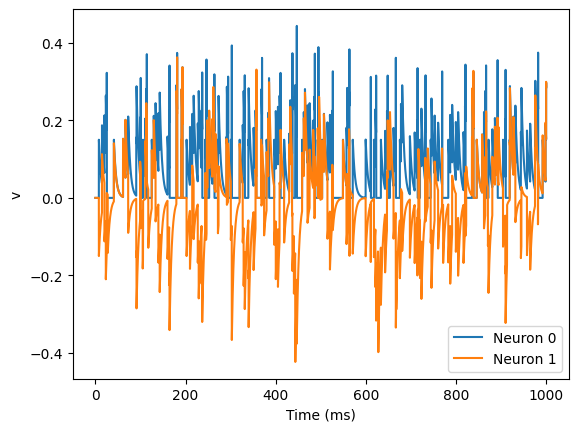

In [12]:
plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend();

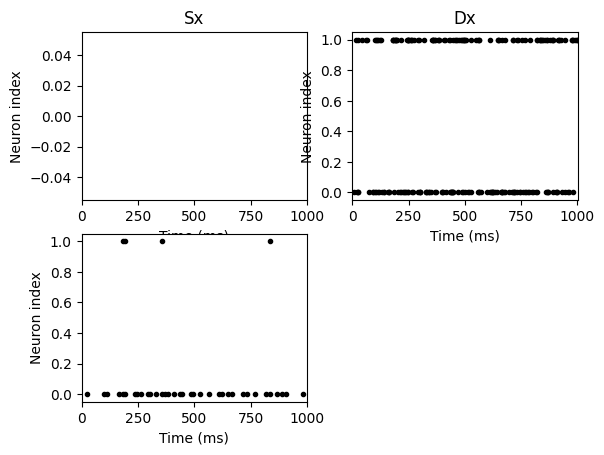

In [13]:
subplot(221)
plot(spMonP1.t/ms, spMonP1.i, '.k')
xlim(-1,1001)
xlabel('Time (ms)')
ylabel('Neuron index')
title('Sx')

subplot(222)
plot(spMonP2.t/ms, spMonP2.i, '.k')
xlim(-1,1001)
xlabel('Time (ms)')
ylabel('Neuron index')
title('Dx')

subplot(223)
plot(spMonG1.t/ms, spMonG1.i, '.k')
xlim(-1,1001)
xlabel('Time (ms)')
ylabel('Neuron index');